In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import scipy.stats as stats
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [2]:
ll

total 2328
-rw-r--r--@ 1 economy  staff      19 Apr 18  2015 README.md
-rw-r--r--  1 economy  staff  204916 Jul  5 19:52 bikeshare.ipynb
-rw-r-----@ 1 economy  staff  323856 Apr 18  2015 test.csv
-rw-r-----@ 1 economy  staff  648353 Apr 18  2015 train.csv


In [3]:
# From : https://www.kaggle.com/c/bike-sharing-demand/details

In [4]:
train = pd.DataFrame.from_csv('train.csv', sep=',')
test = pd.DataFrame.from_csv('test.csv', sep=',')

## Notes
- 'count' is response variable
- objective is to predict 'count' given season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered

In [5]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [22]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
print "Train: %s records\nTest: %s records" %(len(train), len(test))

Train: 10886 records
Test: 6493 records


### Data interpretation:

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

## Exploratory analysis

In [10]:
for i in train.columns:
    print "%s: avg - %s, min - %s, max - %s" % (i,np.mean(train[i]), np.min(train[i]), np.max(train[i]))

season: avg - 2.50661399963, min - 1, max - 4
holiday: avg - 0.0285688039684, min - 0, max - 1
workingday: avg - 0.680874517729, min - 0, max - 1
weather: avg - 1.41842733787, min - 1, max - 4
temp: avg - 20.23085982, min - 0.82, max - 41.0
atemp: avg - 23.6550840529, min - 0.76, max - 45.455
humidity: avg - 61.886459673, min - 0, max - 100
windspeed: avg - 12.7993954069, min - 0.0, max - 56.9969
casual: avg - 36.0219548043, min - 0, max - 367
registered: avg - 155.552177108, min - 0, max - 886
count: avg - 191.574131913, min - 1, max - 977


In [11]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


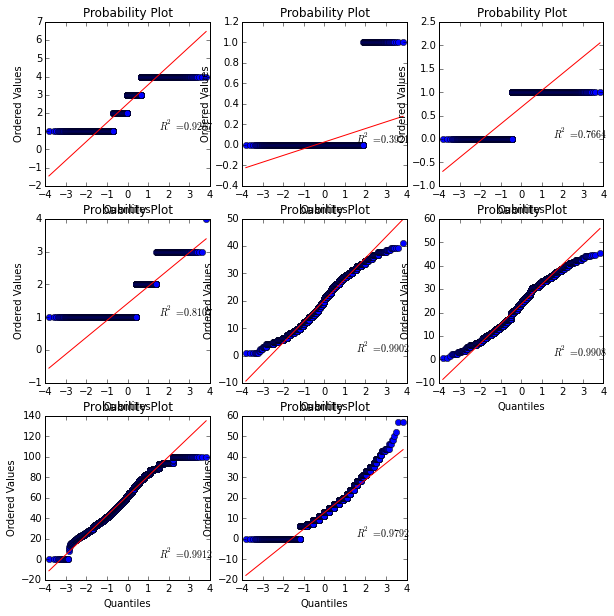

In [7]:
fig = plt.figure(figsize=[10,10])

ax1 = plt.subplot(331)
res = stats.probplot(train['season'], dist="norm", plot=plt)

ax2 = plt.subplot(332)
res = stats.probplot(train['holiday'], dist="norm", plot=plt)

ax3 = plt.subplot(333)
res = stats.probplot(train['workingday'], dist="norm", plot=plt)

ax4 = plt.subplot(334)
res = stats.probplot(train['weather'], dist="norm", plot=plt)

ax5 = plt.subplot(335)
res = stats.probplot(train['temp'], dist="norm", plot=plt)

ax6 = plt.subplot(336)
res = stats.probplot(train['atemp'], dist="norm", plot=plt)

ax7 = plt.subplot(337)
res = stats.probplot(train['humidity'], dist="norm", plot=plt)

ax8 = plt.subplot(338)
res = stats.probplot(train['windspeed'], dist="norm", plot=plt)



plt.show()

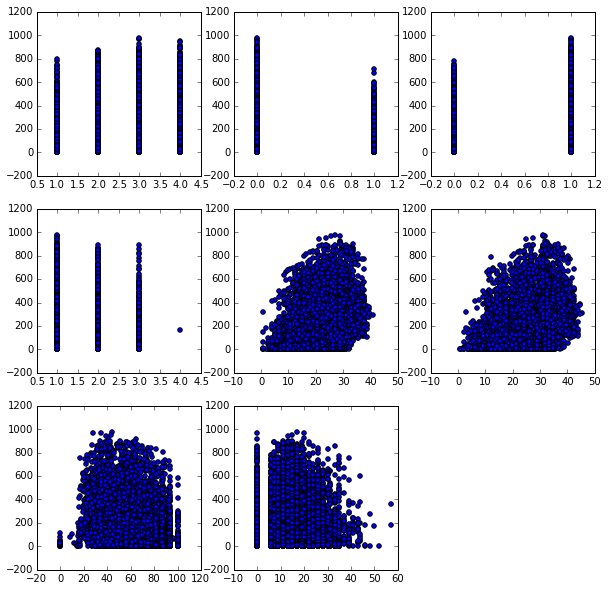

In [8]:
fig = plt.figure(figsize=[10,10])

ax1 = plt.subplot(331)
res = plt.scatter(train['season'],train['count'])

ax2 = plt.subplot(332)
res = plt.scatter(train['holiday'],train['count'])

ax3 = plt.subplot(333)
res = plt.scatter(train['workingday'],train['count'])

ax4 = plt.subplot(334)
res = plt.scatter(train['weather'],train['count'])

ax5 = plt.subplot(335)
res = plt.scatter(train['temp'],train['count'])

ax6 = plt.subplot(336)
res = plt.scatter(train['atemp'],train['count'])

ax7 = plt.subplot(337)
res = plt.scatter(train['humidity'],train['count'])

ax8 = plt.subplot(338)
res = plt.scatter(train['windspeed'],train['count'])

plt.show()

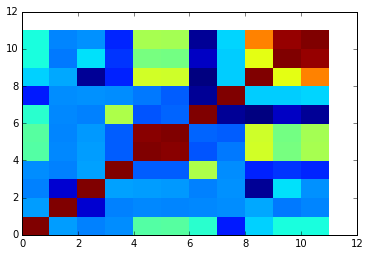

In [9]:
corrMat = pd.DataFrame(train.corr())
plt.pcolor(corrMat)
plt.show()

## Tree?

In [23]:
## NB: GBM classifier needs to predict a class. Adding var to train for count > threshold (0 or 1)
## as binary class.

## Could look into GBM regressor. Loss will be higher.

In [33]:
train['count300'] = np.where(train['count'] > 300, 1, 0)
train['count500'] = np.where(train['count'] > 500, 1, 0)

In [54]:
tree300 = GradientBoostingClassifier(
    max_depth=4,
    min_samples_split=20,
    verbose=1,
    random_state=12345,
    n_estimators=10000
)

In [55]:
tree300.fit(
    train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']],
    train['count300']
)

      Iter       Train Loss   Remaining Time 
         1           1.0330            2.55m
         2           1.0021            2.23m
         3           0.9776            2.11m
         4           0.9575            1.93m
         5           0.9408            1.80m
         6           0.9267            1.81m
         7           0.9142            1.82m
         8           0.9035            1.78m
         9           0.8941            1.73m
        10           0.8848            1.78m
        20           0.8369            1.56m
        30           0.8179            1.48m
        40           0.8064            1.45m
        50           0.7983            1.40m
        60           0.7933            1.35m
        70           0.7886            1.31m
        80           0.7847            1.30m
        90           0.7807            1.29m
       100           0.7768            1.27m
       200           0.7361            1.39m
       300           0.7082            1.42m
       40

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=20, n_estimators=10000,
              random_state=12345, subsample=1.0, verbose=1,
              warm_start=False)

In [56]:
## NB: still converging after 10,000 iterations.

#### Prediction via test set

In [57]:
pred1 = tree300.predict(test[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])

In [58]:
len(pred1)

6493

In [59]:
test['pred_count_300'] = pred1

In [60]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pred_count,pred_count_300,pred_count_500
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.055995,0,0.055995
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,-0.025755,0,-0.025755
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,-0.025755,0,-0.025755
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,-0.092931,0,-0.092931
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,-0.092931,0,-0.092931


(array([ 5259.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1234.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

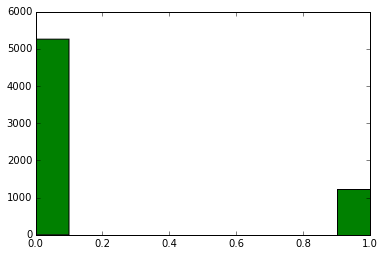

In [61]:
plt.hist(test['pred_count_300'],color='g')

### Repeat for > 500

In [73]:
tree500 = GradientBoostingClassifier(
    max_depth=4,
    min_samples_split=20,
    verbose=1,
    random_state=12345,
    n_estimators=10000
)

In [74]:
tree500.fit(
    train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']],
    train['count500']
)

      Iter       Train Loss   Remaining Time 
         1           0.5021            2.53m
         2           0.4893            2.28m
         3           0.4796            2.01m
         4           0.4720            1.83m
         5           0.4657            1.90m
         6           0.4597            1.86m
         7           0.4549            1.89m
         8           0.4509            1.83m
         9           0.4468            1.76m
        10           0.4436            1.73m
        20           0.4244            1.53m
        30           0.4162            1.44m
        40           0.4118            1.36m
        50           0.4069            1.32m
        60           0.4033            1.32m
        70           0.4001            1.31m
        80           0.3963            1.30m
        90           0.3930            1.28m
       100           0.3894            1.28m
       200           0.3615            1.16m
       300           0.3403            1.24m
       40

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=20, n_estimators=10000,
              random_state=12345, subsample=1.0, verbose=1,
              warm_start=False)

In [75]:
pred500 = tree500.predict(test[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])

In [76]:
test['pred_count_500'] = pred500

In [77]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pred_count,pred_count_300,pred_count_500
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.055995,0,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,-0.025755,0,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,-0.025755,0,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,-0.092931,0,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,-0.092931,0,0


(array([ 6194.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   299.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

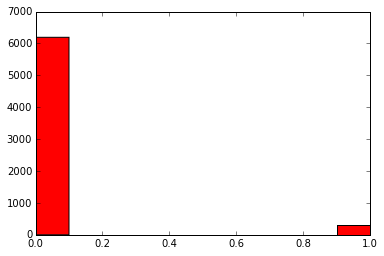

In [78]:
plt.hist(test['pred_count_500'],color='r')

In [89]:
train[['count300', 'count500']].describe()

,count300,count500
count,10886.000000,10886.000000
mean,0.227999,0.073213
std,0.419561,0.260498
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [88]:
test[['pred_count_300', 'pred_count_500']].describe()

,pred_count_300,pred_count_500
count,6493.000000,6493.000000
mean,0.190051,0.046050
std,0.392371,0.209609
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [90]:
test[test['pred_count_300'] != test['pred_count_500']].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pred_count,pred_count_300,pred_count_500
datetime,,,,,,,,,,,
2011-01-24 04:00:00,1,0,1,1,0.82,3.030,48,8.9981,1.171835,1,0
2011-01-24 05:00:00,1,0,1,1,0.82,3.030,48,8.9981,1.171835,1,0
2011-01-28 22:00:00,1,0,1,1,9.84,10.605,65,23.9994,0.300174,1,0
2011-01-31 00:00:00,1,0,1,2,9.84,11.365,65,15.0013,0.282344,1,0
2011-02-21 00:00:00,1,1,0,2,13.94,15.150,42,22.0028,0.977344,1,0


## Regressor Model (absolute counts)

In [91]:
tree_reg = GradientBoostingRegressor(
    max_depth=4,
    min_samples_split=20,
    verbose=1,
    random_state=12345,
    n_estimators=10000
)

In [92]:
tree_reg.fit(
    train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']],
    train['count']
)

      Iter       Train Loss   Remaining Time 
         1       31018.4037            2.06m
         2       29544.3299            1.83m
         3       28348.3946            1.73m
         4       27321.9671            1.59m
         5       26466.1852            1.51m
         6       25765.3836            1.53m
         7       25169.1411            1.58m
         8       24625.3453            1.53m
         9       24164.1193            1.58m
        10       23802.6515            1.54m
        20       21927.1137            1.32m
        30       21319.4552            1.28m
        40       21037.5797            1.27m
        50       20821.9366            1.23m
        60       20708.2364            1.20m
        70       20525.7981            1.20m
        80       20363.9526            1.18m
        90       20220.0982            1.17m
       100       20080.0321            1.16m
       200       19175.1489            1.09m
       300       18520.0380            1.02m
       40

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=4, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=20, n_estimators=10000,
             random_state=12345, subsample=1.0, verbose=1,
             warm_start=False)

In [93]:
pred = tree_reg.predict(test[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']])

In [94]:
test['pred_count'] = pred

In [96]:
test['pred_count'].describe()

count    6493.000000
mean      187.145007
std       139.830340
min      -281.146476
25%        87.162560
50%       165.680319
75%       266.946637
max       910.818605
dtype: float64

In [95]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pred_count,pred_count_300,pred_count_500
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,126.869401,0,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,43.388971,0,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,43.388971,0,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,56.392707,0,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,56.392707,0,0


(array([   10.,    89.,  1334.,  2367.,  1600.,   721.,   252.,    97.,
           15.,     8.]),
 array([-281.14647609, -161.94996803,  -42.75345997,   76.44304809,
         195.63955615,  314.83606421,  434.03257227,  553.22908033,
         672.42558839,  791.62209645,  910.81860451]),
 <a list of 10 Patch objects>)

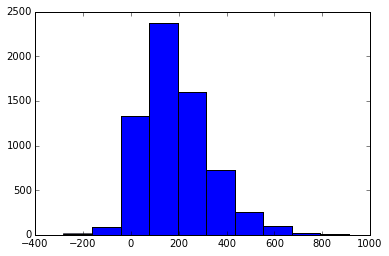

In [99]:
plt.hist(test['pred_count'],color='b')